In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
import glob
import seaborn as sns
import astropy.units as u
from astropy.time import Time
from astropy.io import fits


In [2]:
sns.set_theme()
sns.set_style("ticks")
sns.set_color_codes("colorblind")
sns.set_palette("colorblind")

# SED

In [3]:
def plot_lst_flux_points():
    
    # from 2 GeV - 2 TeV (LST-Fermi joint fit)
    sed = np.load('data/srcdep/sed_points_fermi_joint_fit.npy', allow_pickle=True).item()
    plt.errorbar(sed['e_ref'], sed['e2dnde'], yerr = sed['e2dnde_err'],
                color='black', zorder=8, markersize=5, fmt='o',
                label='LST-1 (src-dependent)') 
    
    # from 50 GeV - 30 TeV (LST-alone fit)
    sed = np.load('data/srcdep/sed_points_g0.7_a0.7.npy', allow_pickle=True).item()
    select = sed['e_ref'] > 2 * u.TeV
    plt.errorbar(sed['e_ref'][select], sed['e2dnde'][select], yerr = sed['e2dnde_err'][select],
                color='black', zorder=8, markersize=5, fmt='o') 


In [4]:
def plot_lst_model():
    
    # 50 GeV - 30 TeV (LST-alone fit)
    model = np.load('data/srcdep/sed_models_g0.7_a0.7.npy', allow_pickle=True).item()
    plt.plot(model['e_center'], model['flux'], label='Log-parabola fit (LST-1)', color='b')
    plt.fill_between(model['e_center'].value, model['flux_lo'].value, model['flux_up'].value,
                     label='Stat. uncertaintiy (LST-1)', alpha = 0.5, zorder = 5, facecolor='b') 

In [5]:
def plot_lst_fermi_joint_fit_model():
    
    # 2 GeV - 2 TeV (LST-Fermi joint fit)
    model = np.load('data/srcdep/sed_models_fermi_joint_fit.npy', allow_pickle=True).item()
    plt.plot(model['e_center'], model['flux'], label='Log-parabola joint fit ($Fermi$-LAT and LST-1)', color='g', ls='dotted', lw=3)
    plt.fill_between(model['e_center'].value, model['flux_lo'].value, model['flux_up'].value,
                     alpha = 0.5, facecolor='gray') 

In [6]:
def plot_lst_model_using_various_eff_cut():
    
    for g_eff in [0.4, 0.7, 0.9]:
        for a_eff in [0.7, 0.9]:
            model = np.load(f"data/srcdep/sed_models_g{g_eff}_a{a_eff}.npy", allow_pickle=True).item()
            
            if g_eff == 0.4 and a_eff == 0.7:
                label = "Uncertainty from several\nefficiency cuts (LST-1)"
            else:
                label = None
                
            plt.fill_between(model['e_center'].value, model['flux_lo'].value, model['flux_up'].value,
                         label=label, alpha = 1, 
                                 facecolor='w', edgecolor="b", hatch="///", lw=0)


In [7]:
def plot_lst_flux_points_bkg_test():
    
    # from 2 GeV - 2 TeV (LST-Fermi joint fit)
    sed = np.load('data/srcdep/sed_points_g0.7_a0.7_bg_norm_0.99.npy', allow_pickle=True).item()
    plt.errorbar(sed['e_ref'], sed['e2dnde'], yerr = sed['e2dnde_err'],
                color='gray', zorder=5, markersize=5, fmt='o', alpha=0.5, mfc='w',
                label="+1% background systematics test (LST-1)") 

In [8]:
def plot_fermi_crab():
    
    hdul = fits.open('data/SED_Crab_FermiLAT_Arakawa2020.fits')
    data = hdul[1].data
    columns = hdul[1].columns
    x = (data['e_ref'] * u.Unit(columns['e_ref'].unit)).to(u.Unit('TeV'))
    plt.errorbar((data['e_ref'] * u.Unit(columns['e_ref'].unit)).to(u.Unit('TeV')),
                 (data['e2dnde'] * u.Unit(columns['e2dnde'].unit)).to(u.Unit('erg cm-2 s-1')),
                 xerr = [x - (10**(np.log10(data['e_ref']) - 0.123) * u.Unit(columns['e_ref'].unit)).to(u.Unit('TeV')),
                         (10**(np.log10(data['e_ref']) + 0.123) * u.Unit(columns['e_ref'].unit)).to(u.Unit('TeV')) - x],
                 yerr=(data['e2dnde_err'] * u.Unit(columns['e2dnde_err'].unit)).to(u.Unit('erg cm-2 s-1')),
                        label="$Fermi$-LAT (Arakawa et al. 2020)", color="m", marker="s", fmt='o', zorder=1)

In [9]:
import pickle
from gammapy.modeling.models import SkyModel

def plot_lst_model_src_indep():
    
    lst1_only_sed_model_file = "data/src_indep/SED_model_CrabNebula_only_LST1.dat"
    
    with open(lst1_only_sed_model_file, "rb") as flux_model:
        lst1_only_model_dict = pickle.load(flux_model)

    lst1_only_model = SkyModel.from_dict(lst1_only_model_dict)
    
    model = np.load('data/srcdep/sed_models_g0.7_a0.7.npy', allow_pickle=True).item()
    
    lst1_only_model.spectral_model.plot(
        sed_type = "e2dnde",
        energy_bounds = [model['e_center'][0], model['e_center'][-1]],
        yunits = u.Unit("erg cm-2 s-1"),
        color='red',
        linestyle = "dashdot",
        linewidth=2,
        label='Log-parabola fit (LST-1, src-independent)',
        zorder=8,        
    )

/tmp/ipykernel_63825/2270661870.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar((data['e_ref'] * u.Unit(columns['e_ref'].unit)).to(u.Unit('TeV')),


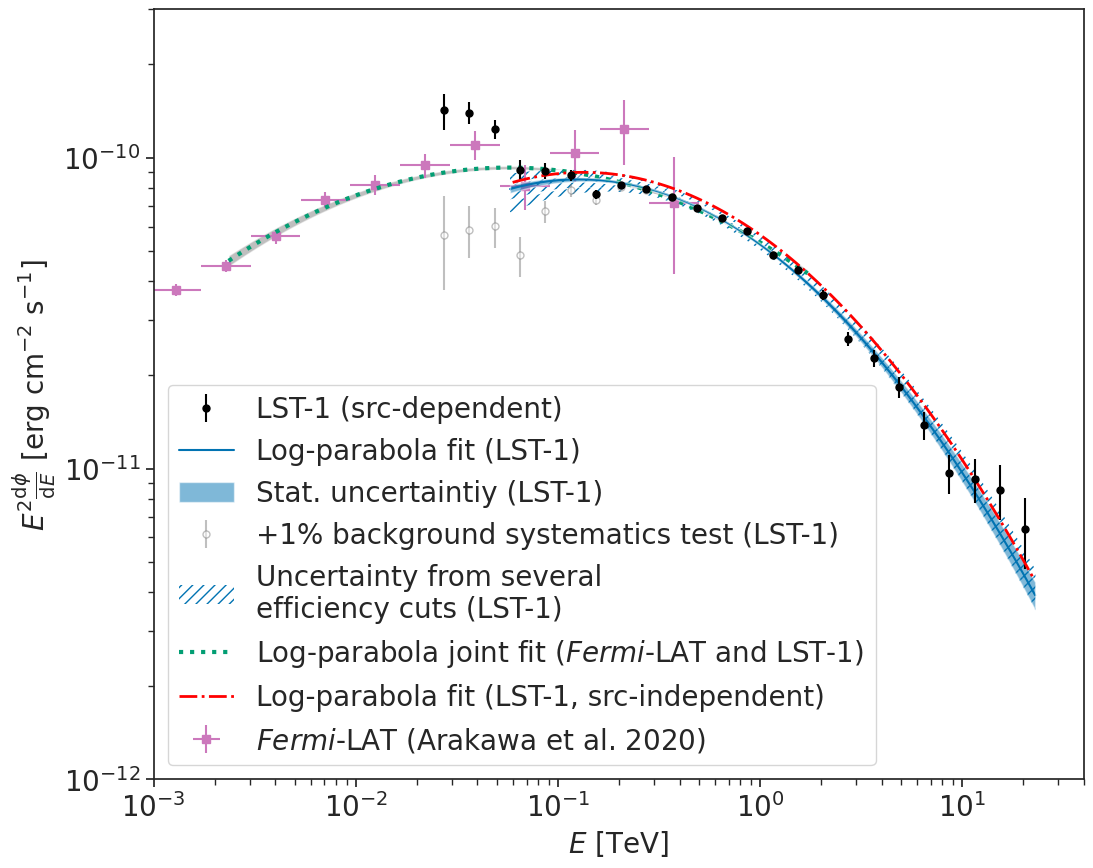

In [10]:
plt.figure(figsize=(12, 10))
plt.rcParams['font.size']=20

plot_lst_flux_points()

plot_lst_model()

plot_lst_fermi_joint_fit_model()
         
plot_lst_model_using_various_eff_cut()       

plot_lst_flux_points_bkg_test()

plot_fermi_crab()

plot_lst_model_src_indep()

plt.ylabel(r"$E^2 \frac{\mathrm{d}\phi}{\mathrm{d}E}$ [erg cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.xlabel(r"$E$ [TeV]", fontsize=20)
plt.xlim(1e-3, 0.4e2)
plt.ylim(1e-12, 3e-10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')

# Reorder labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [5, 0, 1, 6, 3, 2, 4, 7]
plt.legend(
    [handles[idx] for idx in order],[labels[idx] for idx in order], 
    loc="lower left",
    fontsize=20
)

plt.show()


# Light curve

In [11]:
def mjd_to_iso(times):
    return Time(times, format="mjd", scale='utc').iso

def set_twin_time_axis(ax):
    ax2 = ax.twiny()

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator(interval=2)  # every month

    # format the ticks
    ax2.xaxis.set_major_locator(years)
    ax2.xaxis.set_minor_locator(months)

    #Manually adjust
    datemin = np.datetime64(mjd_to_iso(59150), 'W')
    datemax = np.datetime64(mjd_to_iso(59670), 'W')

    ax2.set_xlim(datemin, datemax)

    ax2.format_xdata = mdates.DateFormatter('%b')

    mjdlims = Time([datemin, datemax]).mjd
    ax.set_xlim(mjdlims[0], mjdlims[1])
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

    ax2.tick_params(axis='x', which='major', pad=13)
    ax2.tick_params(axis='x', which='minor', pad=10)

    plt.setp(ax.get_xticklabels(), fontsize=20)
    plt.setp(ax2.get_xticklabels(which='both'), fontsize=20)
    plt.setp(ax.get_yticklabels(which='both'), fontsize=20)

In [12]:
def plot_lst_lc_average():
    
    lc = np.load('data/srcdep/light_curve.npy', allow_pickle=True).item()
    
    plt.axhline(
        lc['flux_average'].value, c='b', ls='-.',
        label='Best fit value to a constant flux (LST-1)',
    )
    plt.axhspan(
        (lc['flux_average'] - lc['flux_average_err']).value,
        (lc['flux_average'] + lc['flux_average_err']).value, 
        alpha=0.2, color='b'
    )

In [13]:
def plot_magic_lc_reference():
    
    lc_crab_magic = 4.76e-10
    lc_crab_magic_err = 0.10e-10

    plt.axhline(
        lc_crab_magic, c='tab:orange', ls='--',
        label=r"MAGIC (Aleksi$\'{\rm{c}}$ et al. 2015)",
    )
    plt.axhspan(
        lc_crab_magic - lc_crab_magic_err,
        lc_crab_magic + lc_crab_magic_err,
        alpha=0.2, color='tab:orange'
    )

In [14]:
def plot_lst_lc():
    
    lc = np.load('data/srcdep/light_curve.npy', allow_pickle=True).item()
  
    plt.errorbar((lc['time_min'] + lc['time_max'])/2.,
                 lc['flux'], 
                 xerr = (lc['time_max'] - lc['time_min'])/2., yerr = lc['flux_err'], fmt = "o",
    color='black',
    label='LST-1 (src-dependent)')

In [15]:
def plot_lst_lc_with_sys_err():
    
    lc_sys = np.load('data/srcdep/light_curve_with_sys_err.npy', allow_pickle=True).item()
    
    plt.errorbar((lc_sys['time_min'] + lc_sys['time_max'])/2.,
             lc_sys['flux'], 
             xerr = (lc_sys['time_max'] - lc_sys['time_min'])/2., yerr = lc_sys['flux_err'], fmt = "o",
    color='gray', alpha = 0.5)

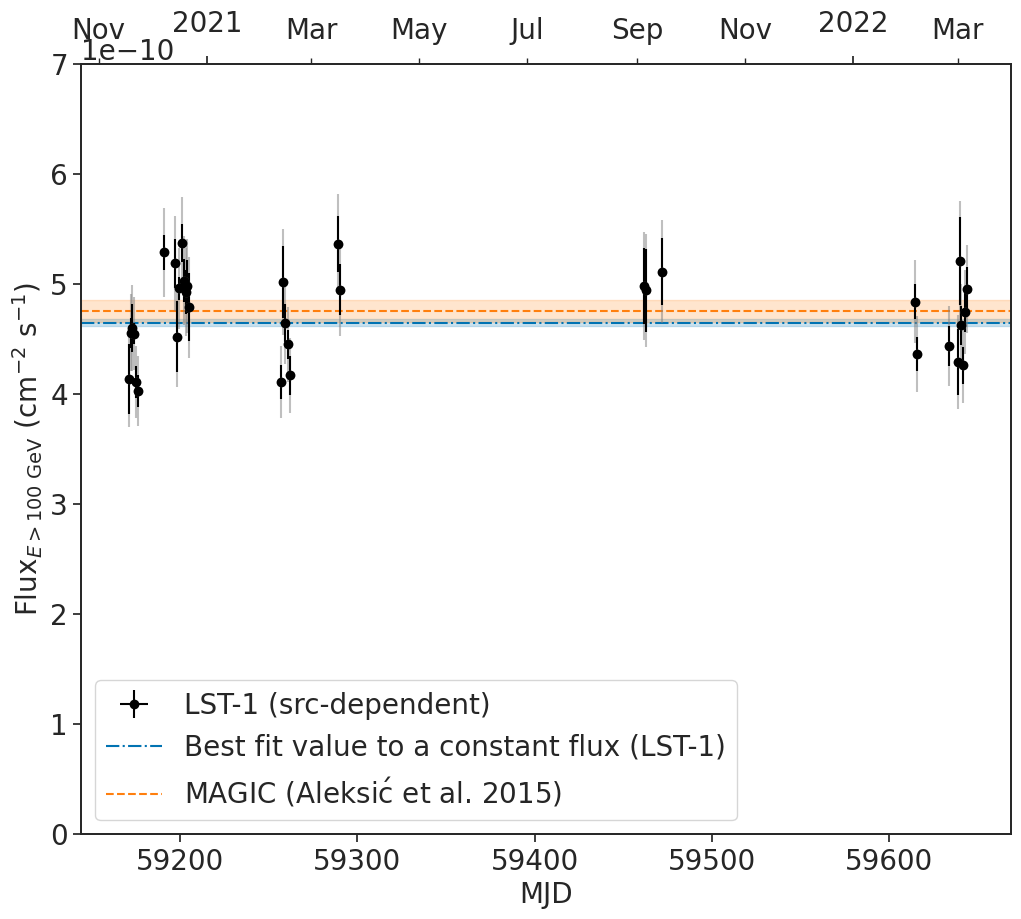

In [16]:
plt.figure(figsize=(12, 10))

plot_lst_lc_average()

plot_magic_lc_reference()

plot_lst_lc_with_sys_err()

plot_lst_lc()

ax = plt.gca()
ax.set_xlabel("MJD", fontsize=20)
ax.set_ylabel(r"Flux$_{E > 100 \rm{~GeV}}$ (cm$^{-2}$ s$^{-1}$)", fontsize=20)
ax.yaxis.get_offset_text().set_fontsize(20)
plt.yscale('linear')
plt.ylim(0, 7e-10)


# Reorder labels in the legend
handles, labels = ax.get_legend_handles_labels()
order = [2, 0, 1]
plt.legend(
    [handles[idx] for idx in order],[labels[idx] for idx in order], 
    loc="lower left",
    fontsize=20
)

set_twin_time_axis(ax)
